In [99]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup as bs
from urllib import request as rq
import urllib
import re
import math
import os
import csv
import time
import json
import pickle
import sys
import requests
from scipy import stats
from math import log

from sklearn.cross_decomposition import PLSRegression
from sklearn import linear_model
from sklearn.metrics import f1_score, precision_score, recall_score
import matplotlib.pyplot as plt
cwd = os.getcwd()
print(cwd)

/var/www/Repositories/oscars/models


In [219]:
# use AA_bestpictures_Liam_Kimiko_clean.csv
# datacsv = open("AA_bestpictures_Liam_Kimiko_clean.csv")
datacsv = open("../AA_4_computed_new.csv")

reader = list(csv.reader(datacsv, delimiter=',', quotechar='"'))

# print(list(reader))
fields = [x.strip() for x in reader.pop(0)]

frame = pd.DataFrame(reader, columns=fields).fillna(0).values
print(fields)
used_fields = fields[5:7] + [fields[8]] + [fields[10]] + [fields[-6]] + [fields[-4]] + [fields[-1]]
print(used_fields)

X = pd.DataFrame(frame[:,[5,6,8,10,-6,-4,-1]]).convert_objects(convert_numeric=True).fillna(0).values
      
print(X)
# X = [[float(x[5].strip()),int(x[6].strip()),int(x[7].strip()),float(x[8].strip()),int(x[9].strip()),float(x[10].strip())] for x in reader]
Y = []

X = np.array(X).T
X[2] = np.log(X[1]+1) # votes
# X[2] = np.log(np.sqrt(100-X[2]+1)+.01) # no longer in reg
# X[4] = np.log(np.sqrt(100-X[4]+1)+.01) # no longer in reg

# X[3] = np.log(np.sqrt(10-X[3]+.01)+.01) # rotten tomatoes rating
# X[5] = np.log(np.sqrt(10-X[5]+.01)+.01) # rotten tomatoes rating


X = np.array([(row - row.min()) / (row.max()-row.min()) for row in X])
# X[1] = (X[1] - X[1].min()) / (X[1].max()-X[1].min())
# print(X[0])
X = X.T
X = list(X)
for x in reader:
    ret = 0
    if x[2].strip() == "True":
        ret = 1
    Y.append(ret)
# for row in reader:
#     print (row)

XTest = X[-100:]
YTest = Y[-100:]
XTrain = X[:-100]
YTrain = Y[:-100]
logreg = linear_model.LogisticRegression(fit_intercept=True,max_iter=1000)
logreg.fit(XTrain, YTrain)

# pls = PLSRegression(n_components=3, max_iter=30000)
# pls.fit(inputs,outputs)
# pred = pls.predict(inputs)
# pls.score(inputs,outputs)
# # pls.get_params()

['year', 'Academy Award', 'Winner', 'Movie Name', 'Producer', 'IMDB Rating', 'IMDB Votes', 'Tomatometer', 'Average Critic Score', 'Percent Audience Liked', 'Average Audience Score', 'Release Date', 'Production Budget', 'Domestic Gross', 'Worldwide Gross', 'Normalized Budget', 'Normalized Gross', 'Return on Investment']
['IMDB Rating', 'IMDB Votes', 'Average Critic Score', 'Average Audience Score', 'Production Budget', 'Worldwide Gross', 'Return on Investment']
[[  8.50000000e+00   4.20041000e+05   8.60000000e+00 ...,   3.30000000e+06
    3.34743340e+07   1.01437376e+01]
 [  7.70000000e+00   2.74825000e+05   7.30000000e+00 ...,   1.50000000e+07
    1.22147772e+08   8.14318480e+00]
 [  7.80000000e+00   4.04650000e+05   8.50000000e+00 ...,   1.80000000e+07
    1.03215094e+08   5.73417189e+00]
 ..., 
 [  7.80000000e+00   8.08600000e+03   7.40000000e+00 ...,   2.00000000e+06
    0.00000000e+00   0.00000000e+00]
 [  7.80000000e+00   2.09000000e+03   9.30000000e+00 ...,   0.00000000e+00
    0

/home/liam/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:15: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [220]:
# print(StatsOnly)
stats.describe(X)

DescribeResult(nobs=520, minmax=(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.]), array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.])), mean=array([ 0.75353846,  0.06385881,  0.65861352,  0.83123932,  0.03313351,
        0.02978177,  0.02176795]), variance=array([ 0.00619593,  0.01520798,  0.03808063,  0.00750673,  0.00627198,
        0.00584901,  0.0044857 ]), skewness=array([-2.87654726,  3.11681346, -0.82473388, -3.61722973,  5.58007109,
        6.98170017,  9.95254055]), kurtosis=array([  20.28020022,   12.01049155,    0.51414413,   31.0255276 ,
         48.79853048,   70.3481014 ,  124.66472061]))

In [221]:
score = logreg.score(XTest, YTest)
print("Our regression has an accuracy of %s%%" % (score*100))


preds =  logreg.predict(XTest)
corr = 0
for o,e in zip(preds,YTest):
    if o == e and o == 1:
        corr += 1
winners = [y for y in YTest if y == 1]
losers = [y for y in YTest if y == 0]
print (YTest)
print(preds)
f1 = f1_score(preds, YTest)
prec = precision_score(preds, YTest)
rec = recall_score(preds, YTest)
print(len(winners))
print(len(losers))
print("We predict winners with an accuracy of %s%%" % ((corr/len(winners))*100))
print('F-score: %s | Precision: %s | Recall: %s' % (f1, prec, rec))

Our regression has an accuracy of 88.0%
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
12
88
We predict winners with an accuracy of 0.0%
F-score: 0.0 | Precision: 0.0 | Recall: 0.0


/home/liam/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1115: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
/home/liam/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1115: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)


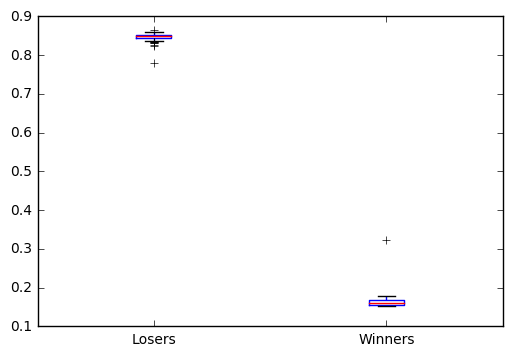

Clearly our regression is better at predicting losers
Ttest_indResult(statistic=118.978715851674, pvalue=8.5893685436928293e-108)
Perhaps this is simply because losers occur more frequently and we dont have enough data to counter act this trend


In [222]:
# gets the prediction strength for each row in Test set
# sorts predictions by class and box plots them
strengths = logreg.predict_proba(XTest)
strengthsSorted = [[],[]]
for strenM, out in zip (strengths,YTest):
    strengthsSorted[out].append(strenM[out])
# print(strengthsSorted)
plt.boxplot(strengthsSorted, labels=["Losers", "Winners"])
plt.show()
ttestres = stats.ttest_ind(strengthsSorted[0], strengthsSorted[1])
print("Clearly our regression is better at predicting losers")
print(ttestres)
print("Perhaps this is simply because losers occur more frequently and we dont have enough data to counter act this trend")

In [223]:
# these are the weights for the models inputs
for l,v in zip(used_fields, logreg.coef_[0]):
    print(l+ ": " + str(v))
print(logreg.intercept_)
print(logreg.coef_[0])
print([[l,v] for l,v in zip(used_fields, logreg.coef_[0])])

IMDB Rating: -0.343001689572
IMDB Votes: 1.36691961195
Average Critic Score: 0.577440469738
Average Audience Score: -0.406537271051
Production Budget: -0.272903499241
Worldwide Gross: 0.69783373108
Return on Investment: 1.34573505719
[-1.47415812]
[-0.34300169  1.36691961  0.57744047 -0.40653727 -0.2729035   0.69783373
  1.34573506]
[['IMDB Rating', -0.34300168957186966], ['IMDB Votes', 1.3669196119522085], ['Average Critic Score', 0.57744046973782626], ['Average Audience Score', -0.40653727105115345], ['Production Budget', -0.27290349924072632], ['Worldwide Gross', 0.69783373108027336], ['Return on Investment', 1.3457350571892375]]


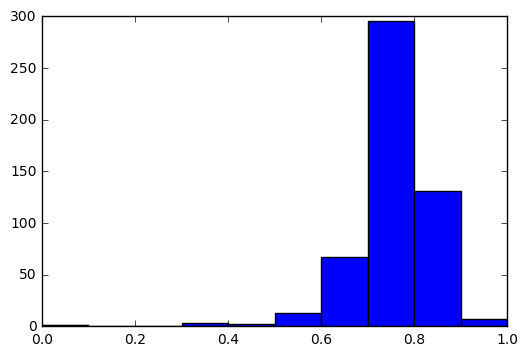

IMDB Rating
Observations: 520
Min: 0.0
Max: 1.0
Mean: 0.753538461538
Median: 0.76
Standard Dev: 0.078638525873






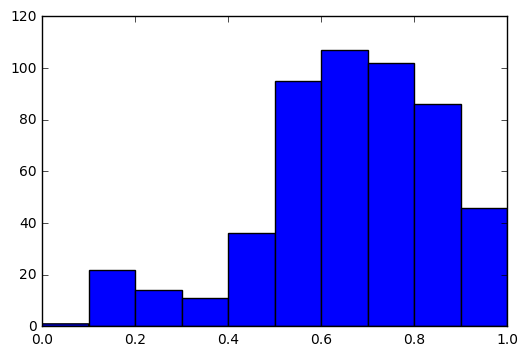

Log10 of IMDB Votes
Observations: 520
Min: 0.0
Max: 1.0
Mean: 0.658613517697
Median: 0.670723214301
Standard Dev: 0.194954861745






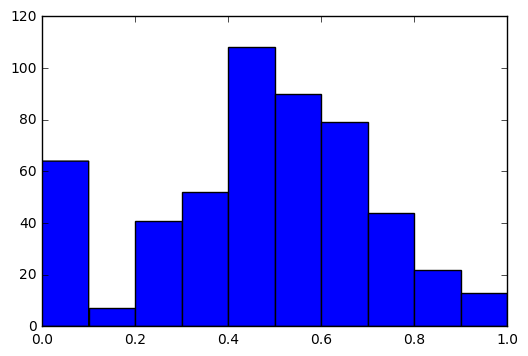

Tomatometer
Observations: 520
Min: 0.0
Max: 1.0
Mean: 0.472555953652
Median: 0.497910588246
Standard Dev: 0.240913910944






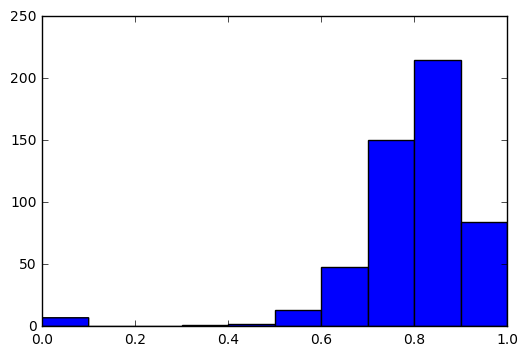

Average Critic Score
Observations: 520
Min: 0.0
Max: 1.0
Mean: 0.799412955466
Median: 0.821052631579
Standard Dev: 0.134068260465






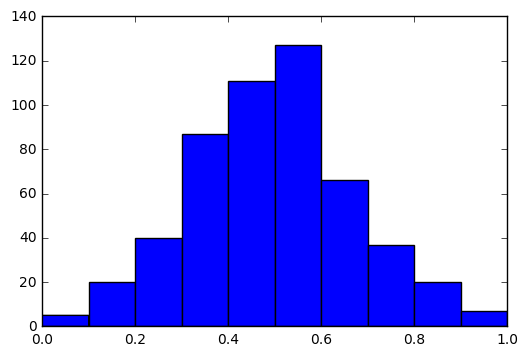

Percent Audience Liked
Observations: 520
Min: 0.0
Max: 1.0
Mean: 0.498756944453
Median: 0.492711781699
Standard Dev: 0.172024475972






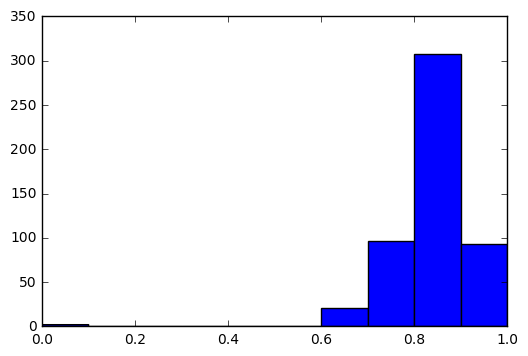

Average Audience Score
Observations: 520
Min: 0.0
Max: 1.0
Mean: 0.831239316239
Median: 0.844444444444
Standard Dev: 0.0865580224806






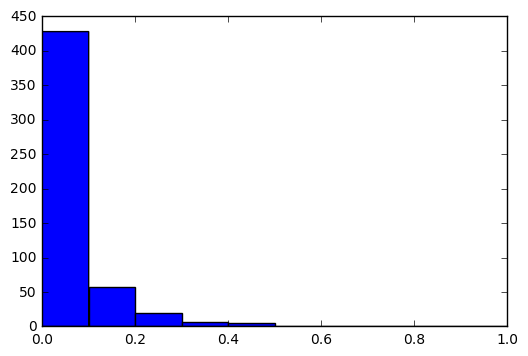

Release Date
Observations: 520
Min: 0.0
Max: 1.0
Mean: 0.0518808147792
Median: 0.0
Standard Dev: 0.101714303555






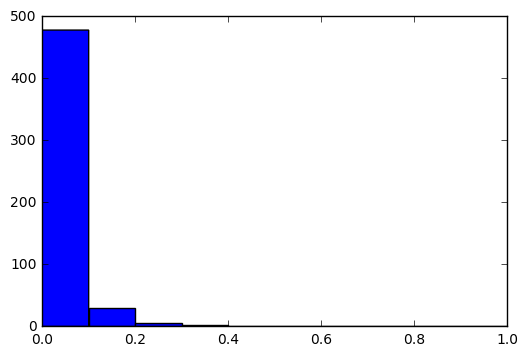

Production Budget
Observations: 520
Min: 0.0
Max: 1.0
Mean: 0.0297817704119
Median: 0.0
Standard Dev: 0.0764052734994






In [176]:
# inputArrs = [[] for i in range(len(X[0]))]
# for i in range(len(X[0])):
#     inputArrs[i] = [x[i] for x in X]
# print(inputArrs)
inputArrs = list(np.array(X).T)
# for i,x in enumerate(inputArrs[1]):
#     if x > 0:
#         inputArrs[1][i] = log(x,10)
# inputArrs[1] = [log(x,10) for x in inputArrs[1]]

for i,arr in enumerate(inputArrs):
    plt.hist(arr, label=fields[i+5], range=(0, 1))
    plt.show()
    if i != 1:
        print(fields[i+5])
    else:
        print("Log10 of %s" % fields[i+5].strip())
    desc = stats.describe(arr)
    print("Observations: %s" % desc.nobs)
    print("Min: %s" % desc.minmax[0])
    print("Max: %s" % desc.minmax[1])
    print("Mean: %s" % desc.mean)
    print("Median: %s" % np.median(arr))
    print("Standard Dev: %s" % np.std(arr))
    print("\n")
    print("\n")